
Working with Images

In this notebook, we will go through the end-to-end pipeline of training conv nets, i.e. organising the data into directories, preprocessing, data augmentation, model building etc.


In [13]:
# For downloading the dataset
# Go to Kaggle.com -> My Account -> Create new API Token -> Upload kaggle.json in Jupyter Home/CNN/
"""
!wget https://raw.githubusercontent.com/chandan110791/Convolutional-Neural-Networks/d8c0d9a087c9aa72f64db593cb07d5019959c499/CNN%20Architectures%20and%20Transfer%20Learning/kaggle.json
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
"""

--2022-08-20 13:06:05--  https://raw.githubusercontent.com/chandan110791/Convolutional-Neural-Networks/d8c0d9a087c9aa72f64db593cb07d5019959c499/CNN%20Architectures%20and%20Transfer%20Learning/kaggle.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75 [text/plain]
Saving to: ‘kaggle.json’

kaggle.json         100%[===================>]      75  --.-KB/s    in 0s      

2022-08-20 13:06:05 (7.38 MB/s) - ‘kaggle.json’ saved [75/75]



In [30]:
"""
!cat ~/.kaggle/kaggle.json
!kaggle config set -n proxy -v http://10.140.0.96:3128
!kaggle datasets download -d alxmamaev/flowers-recogniton
"""

{
  "username": "chandankrsingh3101",
  "key": "5bce5268d15931f314def3d55e6099f8",
  "proxy": "http://10.140.0.96:3128"
}- proxy is now set to: http://10.140.0.96:3128
2022-08-20 13:42:17,826 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f7553e20810>: Failed to establish a new connection: [Errno 110] Connection timed out'))': /api/v1/datasets/download/alxmamaev/flowers-recogniton
User cancelled operation
Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/usr/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 594, in _terminate_pool
    worker_handler.join()
  Fil

In [ ]:
!unzip flowers.zip

In [19]:


# note that pip install skimage might throw an error, rather use this
!pip install scikit-image



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from skimage import io
import os 
import glob
import numpy as np 
import matplotlib.pyplot as plt 
import random

In [21]:
def plot_image(images,captions=None,cmap=None):
  f,axes=plt.subplots(1,len(images),sharey=True)
  f.set_figwidth(15)
  for ax,image in zip(axes,images):
    ax.imshow(image,cmap)

In [37]:


## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)


Mounted at /content/gdrive


In [41]:
!unzip /content/gdrive/MyDrive/ML/CNN/DataSet/flowers.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/tulip/3506615859_9850830cf0.jpg  
  inflating: __MACOSX/flowers/flowers/tulip/._3506615859_9850830cf0.jpg  
  inflating: flowers/flowers/tulip/2813649953_2b0f20fe94_n.jpg  
  inflating: __MACOSX/flowers/flowers/tulip/._2813649953_2b0f20fe94_n.jpg  
  inflating: flowers/flowers/tulip/14253178581_4dfcedb4d3_n.jpg  
  inflating: __MACOSX/flowers/flowers/tulip/._14253178581_4dfcedb4d3_n.jpg  
  inflating: flowers/flowers/tulip/17198868382_697b23c715_n.jpg  
  inflating: __MACOSX/flowers/flowers/tulip/._17198868382_697b23c715_n.jpg  
  inflating: flowers/flowers/tulip/7144016605_e159b6c06b_m.jpg  
  inflating: __MACOSX/flowers/flowers/tulip/._7144016605_e159b6c06b_m.jpg  
  inflating: flowers/flowers/tulip/13530687085_9b515735ef_m.jpg  
  inflating: __MACOSX/flowers/flowers/tulip/._13530687085_9b515735ef_m.jpg  
  inflating: flowers/flowers/tulip/5529939805_1679b014e1_n.jpg  
  inflating: __MACOSX/flowers/flower


Image Augmentation & Preprocessing

In the following section, we'll look at some common image preprocessing techniques.
Understanding images and channels

As these images are RGB images they would constitute three channels - one for each of the color channels


In [42]:
# path to your dataset
DATASET_PATH = './flowers'
flowers_cls = ['daisy', 'rose']



We'll now use the glob module of python to glob through the directory where the data is stored, i.e. to walk through the directory, subdirectories and the files. It uses regular expressions to access files having names matching some pattern. In our case, we want to access all the files in the path flowers/rose/ and flowers/daisy/, so we'll just use the regex * (used as a 'wildcard' to catch everything).

An example of how the glob module works is given below - you first join the base directory path with the subdirectory (e.g. flowers/rose/) and then glob through it to access all the individual files (images here).


In [43]:
flower_path = os.path.join(DATASET_PATH,flowers_cls[1],'*')
print(flower_path)

./flowers/rose/*


In [44]:
flower_path = glob.glob(flower_path)
print(flower_path[3]) # access an individual file

./flowers/rose/5002454522_300a419273_n.jpg


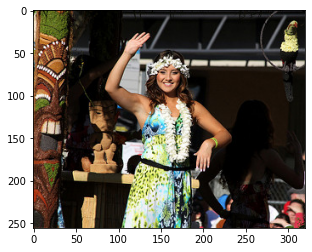

In [46]:
# run this block multiple times to look at some randomly chosen images of roses
rand_index = random.randint(0, len(flower_path))
image = io.imread(flower_path[rand_index])
plt.imshow(image)